In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [92]:
df = pd.read_csv('./iris.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


No missing values

In [94]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

### Feature engineering

In [ ]:
y = df['species'].map({ 'virginica': 0, 'setosa': 1, 'versicolor': 2 })
X = df.drop(columns=['species'])

### Train and evaluate using train, test, split

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [124]:
print('depth: {}'.format(tree.tree_.max_depth))

depth: 6


### Train and evaluate using cross-validation

In [121]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)
scores = cross_val_score(tree, X, y, cv=5)

print(f'mean score: {scores.mean()}')
print(f'score std: {scores.std()}')

mean score: 0.9533333333333334
score std: 0.03399346342395189


In [122]:
print('depth: {}'.format(tree.tree_.max_depth))

depth: 5


The tree has 10 leaves.

In [128]:
# gini importances
importances = pd.DataFrame(tree.feature_importances_, X.columns.values, columns=['importance'])
importances

,importance
sepal_length,0.000000
sepal_width,0.017876
petal_length,0.899746
petal_width,0.082378


# Reducing overfitting

## Stopping by setting a maximum depth

### max_depth = 4

In [131]:
tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X, y)

cv_scores = cross_val_score(tree, X, y, cv=5)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train))) 
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))
print('Mean cv score: {}'.format(cv_scores.mean()))
print('cv score std: {}'.format(cv_scores.std()))

Accuracy on training set: 0.991
Accuracy on test set: 1.000
Mean cv score: 0.9600000000000002
cv score std: 0.03265986323710903


Increased score by 0.0067%

### max_depth = 3

In [132]:
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X, y)

cv_scores = cross_val_score(tree, X, y, cv=5)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train))) 
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))
print('Mean cv score: {}'.format(cv_scores.mean()))
print('cv score std: {}'.format(cv_scores.std()))

Accuracy on training set: 0.964
Accuracy on test set: 1.000
Mean cv score: 0.9533333333333334
cv score std: 0.02666666666666666


Score is the same as when max_depth = 5

### Helpers functions

In [ ]:
# train and evaluate the model using passed in kargs
def train_tree(**kargs):
    tree = DecisionTreeClassifier(**kargs)
    tree.fit(X, y)
    return {
        'train_set_score': tree.score(X_train, y_train),
        'test_set_score': tree.score(X_test, y_test),
        'cv_scores': cross_val_score(tree, X, y, cv=5)
    }

def print_scores(scores):
    print(f"Accuracy on training set: {scores['train_set_score']}")
    print(f"Accuracy on test set: {scores['test_set_score']}")
    print(f"Mean cv score: {scores['cv_scores'].mean()}")
    print(f"cv score std: {scores['cv_scores'].std()}") 

## Stopping by setting maximum leaves

In [159]:
# vary max_leaf_nodes from 9 to 2
value_range = range(9, 1, -1)         

scores = {v: train_tree(random_state=42, max_leaf_nodes=v) for v in value_range}
          
for value, scores in scores.items():
    print(f'max_leaf_nodes = {value}')
    print_scores(scores)
    print('\n')

max_leaf_nodes = 9
Accuracy on training set: 1.0
Accuracy on test set: 1.0
Mean cv score: 0.9600000000000002
cv score std: 0.03265986323710903


max_leaf_nodes = 8
Accuracy on training set: 0.9910714285714286
Accuracy on test set: 1.0
Mean cv score: 0.9600000000000002
cv score std: 0.03265986323710903


max_leaf_nodes = 7
Accuracy on training set: 0.9910714285714286
Accuracy on test set: 1.0
Mean cv score: 0.9533333333333334
cv score std: 0.03399346342395189


max_leaf_nodes = 6
Accuracy on training set: 0.9821428571428571
Accuracy on test set: 1.0
Mean cv score: 0.9533333333333334
cv score std: 0.03399346342395189


max_leaf_nodes = 5
Accuracy on training set: 0.9732142857142857
Accuracy on test set: 1.0
Mean cv score: 0.9533333333333334
cv score std: 0.03399346342395189


max_leaf_nodes = 4
Accuracy on training set: 0.9642857142857143
Accuracy on test set: 1.0
Mean cv score: 0.9533333333333334
cv score std: 0.02666666666666666


max_leaf_nodes = 3
Accuracy on training set: 0.94642857

Score can be increased 0.0067% by reducing max leaf nodes to 9 or 8.

## Stopping by setting minimum samples for splitting

In [163]:
# vary min_samples_split from 10 to 2
value_range = range(10, 1, -1)

scores = {v: train_tree(random_state=42, min_samples_split=v) for v in value_range}
          
for value, scores in scores.items():
    print(f'min_samples_split = {value}')
    print_scores(scores)
    print('\n')

min_samples_split = 10
Accuracy on training set: 0.9732142857142857
Accuracy on test set: 1.0
Mean cv score: 0.9533333333333334
cv score std: 0.02666666666666666


min_samples_split = 9
Accuracy on training set: 0.9732142857142857
Accuracy on test set: 1.0
Mean cv score: 0.9533333333333334
cv score std: 0.02666666666666666


min_samples_split = 8
Accuracy on training set: 0.9732142857142857
Accuracy on test set: 1.0
Mean cv score: 0.96
cv score std: 0.024944382578492935


min_samples_split = 7
Accuracy on training set: 0.9732142857142857
Accuracy on test set: 1.0
Mean cv score: 0.96
cv score std: 0.024944382578492935


min_samples_split = 6
Accuracy on training set: 0.9821428571428571
Accuracy on test set: 1.0
Mean cv score: 0.96
cv score std: 0.024944382578492935


min_samples_split = 5
Accuracy on training set: 0.9821428571428571
Accuracy on test set: 1.0
Mean cv score: 0.96
cv score std: 0.024944382578492935


min_samples_split = 4
Accuracy on training set: 0.9821428571428571
Accura

For min_samples_split in the range [5, 8] scores increased to 0.96 while having a lower std deviation than other values, meaning slightly higher precision. 

Values of 7 and 8 also had lower training set score while maintaining test set score. (idk if this is valid or not)

## Stopping by setting minimum samples in leaf nodes

In [169]:
# vary min_samples_leaf from 10 to 1
value_range = range(10, 0, -1)

scores = {v: train_tree(random_state=42, min_samples_leaf=v) for v in value_range}
          
for value, scores in scores.items():
    print(f'min_samples_leaf = {value}')
    print_scores(scores)
    print('\n')

min_samples_leaf = 10
Accuracy on training set: 0.9464285714285714
Accuracy on test set: 1.0
Mean cv score: 0.9333333333333332
cv score std: 0.04714045207910316


min_samples_leaf = 9
Accuracy on training set: 0.9464285714285714
Accuracy on test set: 1.0
Mean cv score: 0.9333333333333332
cv score std: 0.04714045207910316


min_samples_leaf = 8
Accuracy on training set: 0.9464285714285714
Accuracy on test set: 1.0
Mean cv score: 0.9333333333333332
cv score std: 0.04714045207910316


min_samples_leaf = 7
Accuracy on training set: 0.9464285714285714
Accuracy on test set: 1.0
Mean cv score: 0.9333333333333332
cv score std: 0.04714045207910316


min_samples_leaf = 6
Accuracy on training set: 0.9642857142857143
Accuracy on test set: 1.0
Mean cv score: 0.9333333333333332
cv score std: 0.04714045207910316


min_samples_leaf = 5
Accuracy on training set: 0.9642857142857143
Accuracy on test set: 1.0
Mean cv score: 0.9333333333333332
cv score std: 0.059628479399994376


min_samples_leaf = 4
Accur

Tuning min_samples_leaf didn't improve the score.

## Hyperparameter tuning

In [ ]:
# try grid search and/or random search
# http://chrisstrelioff.ws/sandbox/2015/06/25/decision_trees_in_python_again_cross_validation.html

### Grid search

In [217]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 6)) + [None],
    'max_leaf_nodes': list(range(8, 11)) + [None],
    'min_samples_split': list(range(2, 9))
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
gs.fit(X, y)

print(f'best score: {gs.best_score_}')
for param, value in gs.best_params_.items():
    print(f'best {param} value: {value}')
    


best score: 0.9666666666666667
best criterion value: gini
best max_depth value: 3
best max_leaf_nodes value: 8
best min_samples_split value: 5


Confirm results

In [226]:
tree2 = DecisionTreeClassifier(**gs.best_params_)
cv_scores = cross_val_score(tree2, X, y, cv=10)
print(f'cv scores mean: {cv_scores.mean()}')
print(f'cv scores std: {cv_scores.std()}')

cv scores mean: 0.9666666666666666
cv scores std: 0.033333333333333326


### Random search





In [231]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 6)) + [None],
    'max_leaf_nodes': list(range(8, 11)) + [None],
    'min_samples_split': list(range(2, 9))
}

rs = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
rs.fit(X, y)

print(f'best score: {rs.best_score_}')
for param, value in rs.best_params_.items():
    print(f'best {param} value: {value}')

best score: 0.9666666666666667
best min_samples_split value: 7
best max_leaf_nodes value: 9
best max_depth value: 3
best criterion value: gini


In [232]:
tree3 = DecisionTreeClassifier(**rs.best_params_)
cv_scores = cross_val_score(tree3, X, y, cv=10)
print(f'cv scores mean: {cv_scores.mean()}')
print(f'cv scores std: {cv_scores.std()}')

cv scores mean: 0.9666666666666666
cv scores std: 0.033333333333333326


## Pruning

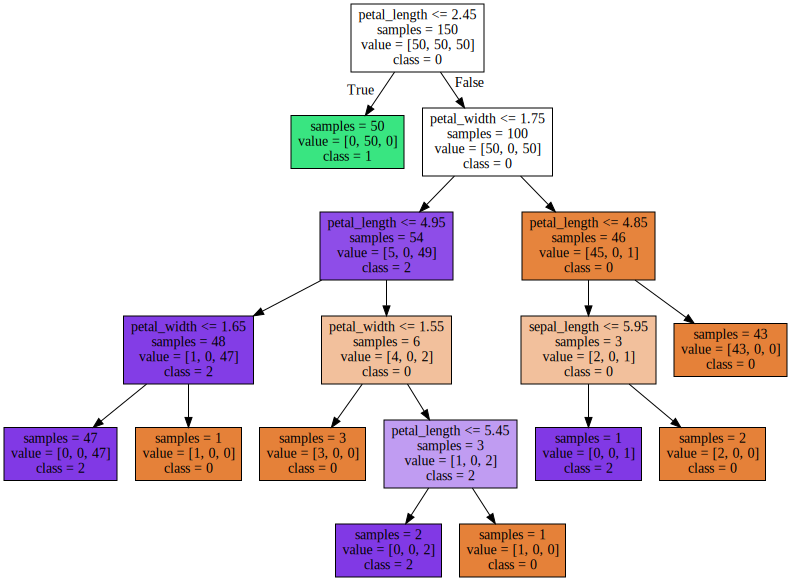

In [171]:
import graphviz
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

export_graphviz(tree, out_file="tree.dot", class_names=["0", "1", '2'],
feature_names=X.columns.values, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)